In [74]:
# Import Libs
# Python package for Mathmatical libs
import math
import calendar
import numpy as np
import pandas as pd

# Python package to read data
import pandas_datareader as web

# Python package for graphical display
import matplotlib.pyplot as plt
%matplotlib inline

# Python package for Data Processing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, LSTM
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score

In [79]:
# Fetch Apple Stock quote from Yahoo for last 10 Years
df = web.DataReader('AAPL', data_source='yahoo', start='2010-01-01', end = '2020-12-30')
df.reset_index(inplace=True)
apple_stock=df[['Date','High','Open','Low','Close','Volume','Adj Close']]
apple_stock['Date'] = pd.to_datetime(apple_stock.Date,format='%Y-%m-%d')
apple_stock['Year']=apple_stock['Date'].dt.year
apple_stock['Month']=apple_stock['Date'].dt.month
apple_stock['Day']=apple_stock['Date'].dt.day
apple_stock['Timestamp']= apple_stock.index


apple_stock = apple_stock[['Day','Month','Year','Adj Close']]
#apple_stock = apple_stock[['Timestamp','Adj Close']]

apple_stock.describe

<bound method NDFrame.describe of       Day  Month  Year   Adj Close
0       4      1  2010    6.583586
1       5      1  2010    6.594968
2       6      1  2010    6.490066
3       7      1  2010    6.478067
4       8      1  2010    6.521136
...   ...    ...   ...         ...
2763   23     12  2020  130.764603
2764   24     12  2020  131.773087
2765   28     12  2020  136.486053
2766   29     12  2020  134.668762
2767   30     12  2020  133.520477

[2768 rows x 4 columns]>

In [80]:
#split into train and validation
training_data_len = math.ceil(len(apple_stock) * .7)
train = apple_stock[:training_data_len]
test = apple_stock[training_data_len:]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_test = test.drop('Adj Close', axis=1)
y_test = test['Adj Close']

In [81]:
# scaler = MinMaxScaler(feature_range=(0, 1))

# #scaling data
# x_train_scaled = scaler.fit_transform(x_train)
# x_train = pd.DataFrame(x_train_scaled)
# x_valid_scaled = scaler.fit_transform(x_test)
# x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=12)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_test)

<ipython-input-82-fb7afd9509ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = 0
<ipython-input-82-fb7afd9509ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = preds


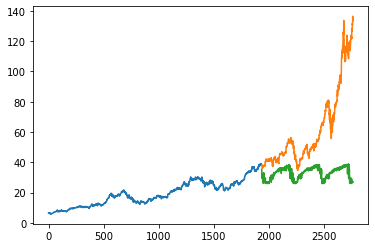

In [82]:
preds=model.predict(x_test)
#plot
test['Predictions'] = 0
test['Predictions'] = preds
training_data_len = math.ceil(len(apple_stock) * .7)

test.index = apple_stock[training_data_len:].index
train.index = apple_stock[:training_data_len].index

plt.plot(train['Adj Close'])
plt.plot(test[['Adj Close', 'Predictions']])

In [83]:
# The Root mean square

print('Mean Squared Error: %.2f' % metrics.mean_squared_error(y_test, preds))
print('Mean Absolute Error: %.2f' % metrics.mean_absolute_error(y_test, preds))
print('Root Mean Squared Error: %.2f' % math.sqrt(metrics.mean_squared_error(y_test, preds)))

Mean Squared Error: 1477.49
Mean Absolute Error: 28.85
Root Mean Squared Error: 38.44


Text(0, 0.5, 'preds')

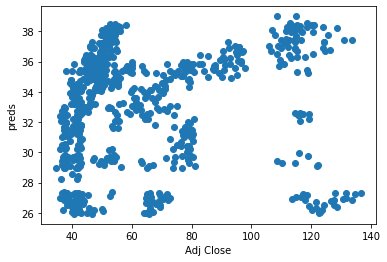

In [84]:
## The line / model
plt.scatter(y_test, preds)
plt.xlabel('Adj Close')
plt.ylabel('preds')

In [40]:
model.score(x_test,y_test)


-0.6012334138951057